In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
#! pip uninstall scikit-learn

Загрузка датасета, проверка на наличие пропусков и дубликатов (их удаление при наличии)


In [18]:
df=pd.read_csv('/Users/margo/Desktop/creditcard.csv')
print('Было удалено', df.duplicated().sum()-1, 'повторяющихся значений')
df=df.drop_duplicates(keep='first')
print('В датафрейме',df.isna().sum().sum(),'пустых значений')

Было удалено 1080 повторяющихся значений
В датафрейме 0 пустых значений


 Основные параметры операции - время платежа(Time), отсчитывается с совершения первой операции, сумма платежа (Amount), набор некоторых параметров V1-V28, а также параметр Class, который принимает значение 1, если операция мошенническая и 0, если честная. Параметр Class выступает в роли target переменной

In [19]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Соотношение мошеннических и честных операций:

In [20]:
C1=df[df['Class']==1]
C2=df[df['Class']==0]
print(len(C1),'мошеннических операций и',len(C2),'честных операций')

473 мошеннических операций и 283253 честных операций


Очевидно, что данные несбалансированны, поскольку количество мошеннических операций минимально по отношению к честным. Перебалансируем данные методом NearMiss-1

Построение карты распределения кореляций для сбалансированной выборки

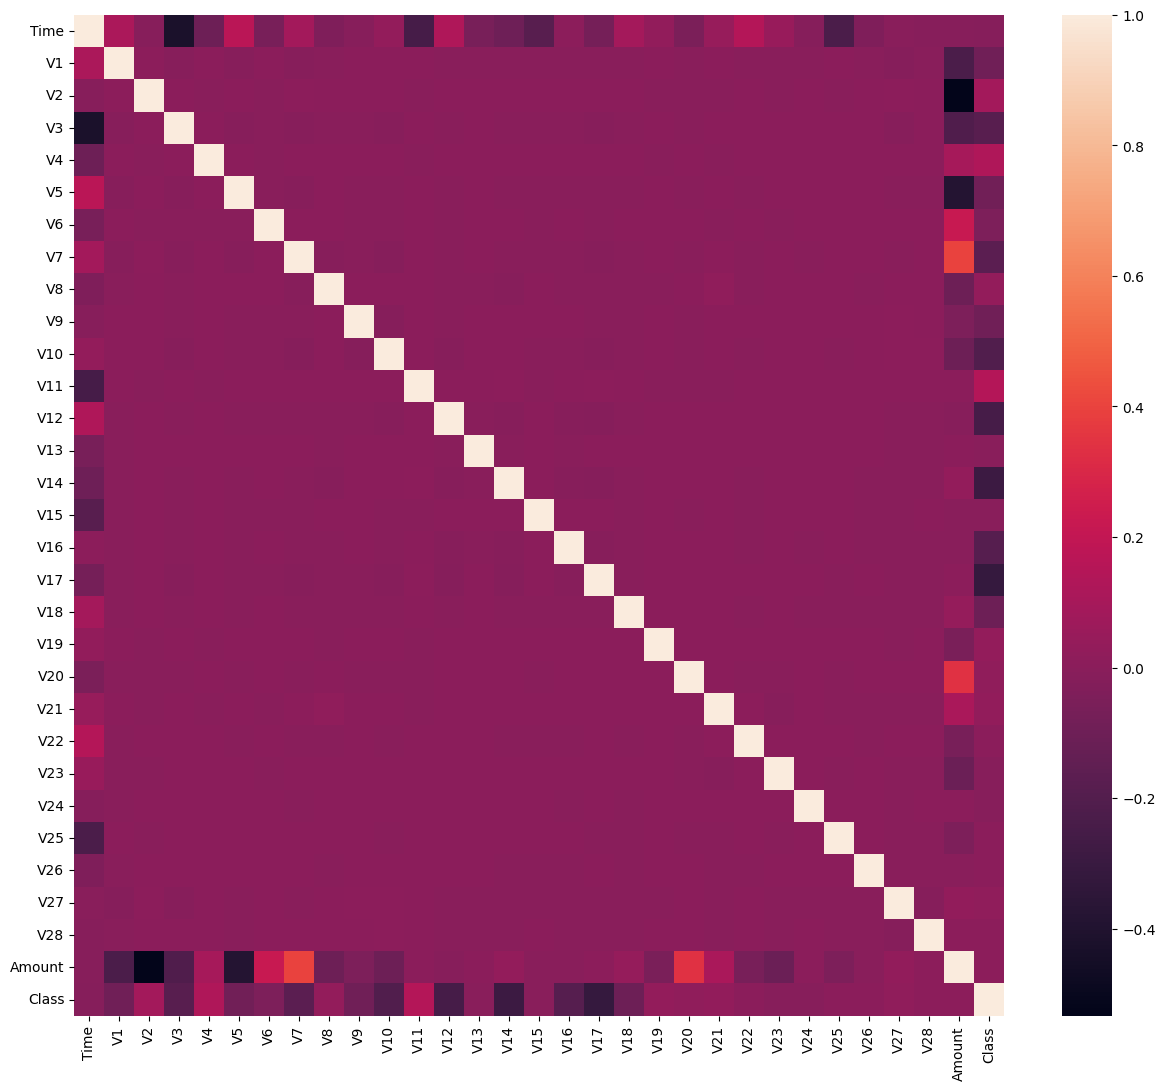

In [21]:

plt.figure(figsize = (15,13))
sns.heatmap(df.corr());

Отметим, что данные между собой не кореллируют. Разделим выборку на две подвыборки train и test, сохраняяя пропорции фичи Class

In [22]:
x=df.drop('Class',axis=1)
y=df['Class']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=0,
    test_size=0.2,
    stratify=y
)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train_ss = pd.DataFrame(data=ss.transform(x_train), columns=ss.get_feature_names_out())
x_test_ss = pd.DataFrame(data=ss.transform(x_test), columns=ss.get_feature_names_out())

Сделаем under_sample обучающей выборки

In [23]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version=1)
x,y=nm.fit_resample(x_train_ss, y_train)
x1=x
print('Вхождение данных разных классов в сбалансированную выборку')
print( y.value_counts())


Вхождение данных разных классов в сбалансированную выборку
Class
0    378
1    378
Name: count, dtype: int64


Сравним статистики  генеральной, обучающей и тестовой выборки

In [24]:
print('Статистики генеральной выборки')
df.describe()

Статистики генеральной выборки


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [25]:
print('Статистики обучающей выборки')
x.describe()

Статистики обучающей выборки


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,-0.124708,-0.835857,1.140534,-2.619110,1.869585,-0.966906,-0.819037,-2.041530,0.304953,-1.031922,...,0.266805,0.274617,-0.110184,-0.112548,-0.127928,0.284836,-0.061066,0.279073,0.156952,0.015967
std,1.013550,2.894075,2.107022,3.809075,1.962862,2.979534,0.978886,4.637969,3.566378,2.081394,...,1.303187,2.921663,1.266224,1.880761,0.709995,1.224827,0.789811,2.306556,1.182131,0.784630
min,-1.986337,-15.819324,-5.169416,-20.674019,-0.885658,-16.076036,-4.338928,-35.541669,-34.922043,-12.251695,...,-5.432960,-31.603738,-12.286493,-31.193781,-3.350994,-9.189338,-2.330839,-18.344353,-5.668148,-0.357167
25%,-1.004274,-1.230309,0.000145,-3.371440,0.479328,-0.947455,-1.064084,-2.441161,-0.210731,-1.928047,...,-0.196473,-0.209253,-0.661655,-0.291524,-0.489506,-0.187432,-0.611288,-0.065772,-0.021605,-0.353122
50%,-0.339926,0.577799,0.375557,-1.261182,0.883387,0.092314,-0.616307,0.082745,-0.020679,-0.311733,...,-0.000525,-0.032004,-0.251200,-0.102998,-0.120500,0.297807,-0.237019,0.069659,0.099020,-0.324204
75%,0.877184,0.726631,1.669552,-0.342661,2.902199,0.304117,-0.354895,0.215249,0.535563,0.565839,...,0.465519,0.804944,0.189303,0.183171,0.324760,1.038033,0.484694,1.041620,0.475146,0.071561
max,1.641938,1.099553,13.576485,1.492310,8.589412,8.068148,4.864446,4.734040,17.022103,3.061430,...,14.550641,37.712370,11.562723,8.854675,1.802015,4.244219,5.688390,7.704981,5.389482,8.240935


In [26]:
y.describe()

count    756.000000
mean       0.500000
std        0.500331
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

In [27]:
print('Статистики тестовой выборки')
x_test_ss.describe()
x1=x_test_ss.describe()

Статистики тестовой выборки


In [28]:
y_test.describe()

count    56746.000000
mean         0.001674
std          0.040882
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

Проведем обучение моделей catboost, knn и decision tree на сбалансированной выборке, в качестве метрик точности будем использовать precision,recall и f1 меру, также выведем confusion matrix

In [29]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(verbose=False)
cb.fit(x, y)
y_pred = cb.predict(x_test_ss)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test,y_pred),confusion_matrix(y_test,y_pred)

(0.0017662917170214744,
 1.0,
 0.0035263548626577575,
 array([[ 2961, 53690],
        [    0,    95]]))

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x, y);
knn_y_pred = knn_model.predict(x_test_ss)
precision_score(y_test, knn_y_pred), recall_score(y_test, knn_y_pred), f1_score(y_test,knn_y_pred),confusion_matrix(y_test,knn_y_pred)

(0.008616516603737051,
 0.9368421052631579,
 0.017075978511128166,
 array([[46411, 10240],
        [    6,    89]]))

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x, y)
tree_y_pred = model.predict(x_test_ss)
precision_score(y_test, tree_y_pred), recall_score(y_test, tree_y_pred), f1_score(y_test,tree_y_pred),confusion_matrix(y_test,tree_y_pred)

(0.0018552875695732839,
 0.9578947368421052,
 0.0037034022464593848,
 array([[ 7693, 48958],
        [    4,    91]]))

Результаты получились крайне неудовлетворительны, попробуем сделать оверсэмплинг методом SMOTE(Synthetic Minority Over-sampling Technique)

In [32]:
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=42)


x_train_res,y_train_res = sm.fit_resample(x_train_ss, y_train)
print('Вхождение данных разных классов в сбалансированную выборку')
print( y_train_res.value_counts())

Вхождение данных разных классов в сбалансированную выборку
Class
0    226602
1    226602
Name: count, dtype: int64


In [33]:
cb.fit(x_train_res, y_train_res)
y_pred1 = cb.predict(x_test_ss)
precision_score(y_test, y_pred1), recall_score(y_test, y_pred1), f1_score(y_test,y_pred1),confusion_matrix(y_test,y_pred1)

(0.5220125786163522,
 0.8736842105263158,
 0.6535433070866141,
 array([[56575,    76],
        [   12,    83]]))

In [34]:
knn_model.fit(x_train_res, y_train_res);
knn_y_pred1 = knn_model.predict(x_test_ss)
precision_score(y_test, knn_y_pred1), recall_score(y_test, knn_y_pred1), f1_score(y_test,knn_y_pred1),confusion_matrix(y_test,knn_y_pred1)

(0.46511627906976744,
 0.8421052631578947,
 0.599250936329588,
 array([[56559,    92],
        [   15,    80]]))

In [35]:
model.fit(x_train_res, y_train_res)
tree_y_pred1 = model.predict(x_test_ss)
precision_score(y_test, tree_y_pred1), recall_score(y_test, tree_y_pred1), f1_score(y_test,tree_y_pred1),confusion_matrix(y_test,tree_y_pred1)

(0.01816283924843424,
 0.9157894736842105,
 0.035619242579324466,
 array([[51948,  4703],
        [    8,    87]]))

Наилучший результат показала модель catboost, однако результаты нельзя назвать удовлетворительными, очевидно, в данной задаче сэмплирование было применять нерационально

Проверим, не внесли ли мы дисперсию в данные при сэмплировании

In [36]:
abs(x_train_ss.describe()-x1.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,226972.000000,226972.000000,226972.000000,226972.000000,226972.000000,226972.000000,226972.000000,226972.000000,226972.000000,226972.000000,...,226972.000000,226972.000000,226972.000000,226972.000000,226972.000000,226972.000000,226972.000000,226972.000000,226972.000000,226972.000000
mean,7093.316916,7090.849522,7089.985513,7090.940175,7094.386909,7092.681915,7093.499343,7094.999221,7090.065940,7093.324375,...,7096.229892,7093.314015,7092.741222,7090.940325,7093.643151,7092.698529,7093.576270,7093.907860,7096.112766,7103.150796
std,20061.713695,20062.712142,20063.065303,20062.675654,20061.281833,20061.975353,20061.642071,20061.040302,20063.034427,20061.711166,...,20060.548911,20061.721915,20061.947448,20062.687895,20061.582078,20061.964966,20061.609152,20061.479155,20060.594017,20057.759293
min,0.000042,7.494762,5.767205,9.732511,0.305917,53.316619,3.179577,12.518596,19.395952,3.605449,...,42.807321,16.553975,1.982324,19.406117,0.023033,3.072638,0.145554,34.660378,21.232549,0.000000
25%,0.489498,0.353721,0.273434,0.431812,0.450203,0.350122,0.274566,0.341156,0.127524,0.410265,...,0.147353,0.208334,0.566126,0.182758,0.437344,0.455231,0.424353,0.137927,0.116738,0.050041
50%,0.684906,0.337309,0.228046,0.277078,0.288350,0.265730,0.351206,0.224442,0.126471,0.321424,...,0.168367,0.171682,0.369666,0.137774,0.329540,0.322842,0.351362,0.118172,0.099909,0.247984
75%,0.221249,0.419768,3.214157,0.760713,3.194596,6.294450,4.948667,9.279664,4.561183,2.280005,...,13.591244,8.333825,2.533114,8.975755,1.677180,2.882939,2.044663,7.153129,12.336295,20.626238
max,56744.356925,56744.733486,56732.423515,56739.767674,56734.036855,56720.691935,56690.917280,56647.604152,56728.977897,56731.772277,...,56695.845647,56708.287630,56731.476893,56709.503796,56738.427739,56731.547968,56738.711235,56666.176331,56643.423728,56642.449021


Видим, что сэмплирование данных внесло большие изменения в данные, можно делать вывод, что при сэмплировании данных значительно изменилось их распределение

Воспользуемся методами логистической регрессии и SVM

In [37]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train_ss, y_train)
LR_pred=LR.predict(x_test_ss)
precision_score(y_test, LR_pred), recall_score(y_test, LR_pred), f1_score(y_test,LR_pred),confusion_matrix(y_test,LR_pred)

(0.8923076923076924,
 0.6105263157894737,
 0.725,
 array([[56644,     7],
        [   37,    58]]))

In [38]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train_ss, y_train)
svm_pred = clf.predict(x_test_ss)

In [39]:
precision_score(y_test, LR_pred), recall_score(y_test, svm_pred), f1_score(y_test,svm_pred),confusion_matrix(y_test,svm_pred)

(0.8923076923076924,
 0.7894736842105263,
 0.8333333333333333,
 array([[56641,    10],
        [   20,    75]]))

Сводная таблица

In [40]:
metrics_df = pd.DataFrame()
metrics_df['precision'] = [precision_score(y_test, y_pred), precision_score(y_test, knn_y_pred),
                          precision_score(y_test, tree_y_pred),
                          precision_score(y_test, LR_pred), precision_score(y_test, svm_pred),
                          precision_score(y_test, y_pred1),precision_score(y_test, knn_y_pred1),
                          precision_score(y_test, tree_y_pred1)]

metrics_df['recall'] = [recall_score(y_test, y_pred), recall_score(y_test, knn_y_pred),
                          recall_score(y_test, tree_y_pred),
                          recall_score(y_test, LR_pred), recall_score(y_test, svm_pred),
                          recall_score(y_test, y_pred1),recall_score(y_test, knn_y_pred1),
                          recall_score(y_test, tree_y_pred1)]

metrics_df['f1'] = [f1_score(y_test, y_pred), f1_score(y_test, knn_y_pred),
                          f1_score(y_test, tree_y_pred),
                          f1_score(y_test, LR_pred), f1_score(y_test, svm_pred),
                          f1_score(y_test, y_pred1),f1_score(y_test, knn_y_pred1),
                          f1_score(y_test, tree_y_pred1)]

metrics_df.index = ['Catboost NearMiss', 'knn NearMiss', 'DecisionTree NearMiss', 'Logistic Regression', 'SVM',
                   'Catboost SMOTE','knn SMOTE','DecisionTree SMOTE' ]

metrics_df

,precision,recall,f1
Catboost NearMiss,0.001766,1.000000,0.003526
knn NearMiss,0.008617,0.936842,0.017076
DecisionTree NearMiss,0.001855,0.957895,0.003703
Logistic Regression,0.892308,0.610526,0.725000
SVM,0.882353,0.789474,0.833333
Catboost SMOTE,0.522013,0.873684,0.653543
knn SMOTE,0.465116,0.842105,0.599251
DecisionTree SMOTE,0.018163,0.915789,0.035619


Запуск обученных на сэмплированных данных моделей на исходной выборке

In [41]:
y_pred2 = cb.predict(x)
precision_score(y, y_pred2), recall_score(y, y_pred2), f1_score(y,y_pred2),confusion_matrix(y,y_pred2)

(0.9197080291970803,
 1.0,
 0.9581749049429658,
 array([[345,  33],
        [  0, 378]]))

In [42]:
y_pred2 = knn_model.predict(x)
precision_score(y, y_pred2), recall_score(y, y_pred2), f1_score(y,y_pred2),confusion_matrix(y,y_pred2)

(0.9356435643564357,
 1.0,
 0.9667519181585679,
 array([[352,  26],
        [  0, 378]]))

In [43]:
y_pred2 = model.predict(x)
precision_score(y, y_pred2), recall_score(y, y_pred2), f1_score(y,y_pred2),confusion_matrix(y,y_pred2)

(0.7928730512249443,
 0.9417989417989417,
 0.8609431680773881,
 array([[285,  93],
        [ 22, 356]]))

Получили более качественные значения метрик (это говорит о переобученности модели)